## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems

In [1]:
%matplotlib inline 

from imports import *
import pickle

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=32)  # fontsize of the figure title

# Figures 1 + 2: Compare Image Fidelity for Different Algorithms and Compare PSNR over time using NLM

In [ ]:
main_problem = create_problem('./data/Set12/13.png', H=256, W=256, sigma=5)

In [ ]:
z_SVRG_1, time_SVRG_1, psnr_SVRG_1, zs_SVRG = pnp_svrg(main_problem, 'nlm', eta=1900, tt=200, T2=30, mini_batch_size=1000, verbose=True)

In [ ]:
z_GD_1, time_GD_1, psnr_GD_1, zs_GD = pnp_gd(main_problem, 'nlm', eta=2000, tt=200, verbose=True)

In [ ]:
z_SGD_1, time_SGD_1, psnr_SGD_1, zs_SGD = pnp_sgd(main_problem, 'nlm', eta=1500, tt=200, mini_batch_size=5000, verbose=True)

In [ ]:
z_SVRG_2, time_SVRG_2, psnr_SVRG_2, zs_SVRG = pnp_svrg(main_problem, 'cnn', eta=25000, tt=100, T2=10, mini_batch_size=20000, verbose=True)

In [ ]:
z_GD_2, time_GD_2, psnr_GD_2, zs_GD = pnp_gd(main_problem, 'cnn', eta=20000, tt=100, verbose=True)

In [ ]:
z_SGD_2, time_SGD_2, psnr_SGD_2, zs_SGD = pnp_sgd(main_problem, 'cnn', eta=20000, tt=100, mini_batch_size=20000, verbose=True)

In [ ]:
# z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(main_problem, 'nlm', eta=2000, tt=200, mini_batch_size=1000, prob_update=.04, verbose=True)

In [ ]:
# show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), 
#            torch.Tensor(z_SVRG), torch.Tensor(z_SGD), torch.Tensor(z_GD)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG), "PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD), "PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD)], rows=1, cols=5, figsize=(20,20))

import matplotlib.gridspec as gridspec

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=24)  # fontsize of the figure title

length_x_axis = 50
length_y_axis = 50

rows  = 2
columns = 4

fig_height = 8.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(main_problem['original'], cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[1, 0])
ax2.imshow(main_problem['noisy'], cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], main_problem['noisy']))

ax3 = plt.subplot(gs[0, 1])
ax3.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("PnP-SVRG, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG_1))

ax4 = plt.subplot(gs[0, 2])
ax4.imshow(z_SGD_1, cmap='gray', vmin=0, vmax=1)
ax4.title.set_text("PnP-SGD, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD_1))

ax5 = plt.subplot(gs[0, 3])
ax5.imshow(z_GD_1, cmap='gray', vmin=0, vmax=1)
ax5.title.set_text("PnP-GD, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD_1))

ax6 = plt.subplot(gs[1, 1])
ax6.imshow(z_SVRG_2, cmap='gray', vmin=0, vmax=1)
ax6.title.set_text("PnP-SVRG, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG_2))

ax7 = plt.subplot(gs[1, 2])
ax7.imshow(z_SGD_2, cmap='gray', vmin=0, vmax=1)
ax7.title.set_text("PnP-SGD, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD_2))

ax8 = plt.subplot(gs[1, 3])
ax8.imshow(z_GD_2, cmap='gray', vmin=0, vmax=1)
ax8.title.set_text("PnP-GD, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD_2))

# plt.subplots_adjust(top = 0, bottom = 0, right = 0, left = 0, 
#             hspace = 0, wspace = 0)
# plt.margins(0,0)

plt.savefig("./figures/psnr_vs_algo.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()


# show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), torch.Tensor(z_SVRG)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG)], figsize=(8,8))

In [ ]:
# show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), 
#            torch.Tensor(z_SVRG), torch.Tensor(z_SGD), torch.Tensor(z_GD)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG), "PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD), "PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD)], rows=1, cols=5, figsize=(20,20))

import matplotlib.gridspec as gridspec

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=18)  # fontsize of the figure title
title_font_size=12

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(main_problem['original'], cmap='gray', vmin=0, vmax=1)
plt.title('Original', fontsize=title_font_size)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/fig1/original.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(main_problem['noisy'], cmap='gray', vmin=0, vmax=1)
plt.title("Initialization, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], main_problem['noisy']), fontsize=title_font_size)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/fig1/noisy.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG_1), fontsize=title_font_size)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/fig1/nlm_svrg.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SGD_1, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD_1), fontsize=title_font_size)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/fig1/nlm_sgd.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_GD_1, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD_1), fontsize=title_font_size)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/fig1/nlm_gd.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SVRG_2, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG_2), fontsize=title_font_size)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/fig1/cnn_svrg.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SGD_2, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD_2), fontsize=title_font_size)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/fig1/cnn_sgd.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_GD_2, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD_2), fontsize=title_font_size)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/fig1/cnn_gd.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# ax2 = plt.subplot(gs[1, 0])
# ax2.imshow(main_problem['noisy'], cmap='gray', vmin=0, vmax=1)
# ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], main_problem['noisy']))

# ax3 = plt.subplot(gs[0, 1])
# ax3.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
# ax3.title.set_text("PnP-SVRG, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG_1))

# ax4 = plt.subplot(gs[0, 2])
# ax4.imshow(z_SGD_1, cmap='gray', vmin=0, vmax=1)
# ax4.title.set_text("PnP-SGD, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD_1))

# ax5 = plt.subplot(gs[0, 3])
# ax5.imshow(z_GD_1, cmap='gray', vmin=0, vmax=1)
# ax5.title.set_text("PnP-GD, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD_1))

# ax6 = plt.subplot(gs[1, 1])
# ax6.imshow(z_SVRG_2, cmap='gray', vmin=0, vmax=1)
# ax6.title.set_text("PnP-SVRG, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG_2))

# ax7 = plt.subplot(gs[1, 2])
# ax7.imshow(z_SGD_2, cmap='gray', vmin=0, vmax=1)
# ax7.title.set_text("PnP-SGD, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD_2))

# ax8 = plt.subplot(gs[1, 3])
# ax8.imshow(z_GD_2, cmap='gray', vmin=0, vmax=1)
# ax8.title.set_text("PnP-GD, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD_2))

# # plt.subplots_adjust(top = 0, bottom = 0, right = 0, left = 0, 
# #             hspace = 0, wspace = 0)
# # plt.margins(0,0)

# plt.savefig("./figures/psnr_vs_algo.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

# plt.show()

In [ ]:
with open('fig1.pkl', 'wb') as f:  
    pickle.dump([main_problem, z_SVRG, z_SGD, z_GD, time_SVRG, time_GD, time_SGD], f)

In [ ]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure(figsize=(8,8))
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(np.cumsum(time_SVRG_1), psnr_SVRG_1,"b", linewidth=3)
# psnr_ax.plot(np.cumsum(time_LSVRG), psnr_LSVRG, "m", linewidth=3)
psnr_ax.plot(np.cumsum(time_GD_1), psnr_GD_1,"g", linewidth=3)
psnr_ax.plot(np.cumsum(time_SGD_1), psnr_SGD_1,"r", linewidth=3)

psnr_ax.plot(np.cumsum(time_SVRG_1)[::100], psnr_SVRG_1[::100],"b*", markersize=10)
# psnr_ax.plot(np.cumsum(time_LSVRG)[::100], psnr_LSVRG[::100],"mo", markersize=10)
psnr_ax.plot(np.cumsum(time_GD_1)[::100], psnr_GD_1[::100],"gv", markersize=10)
psnr_ax.plot(np.cumsum(time_SGD_1)[::100], psnr_SGD_1[::100],"rs", markersize=10)

psnr_ax.set(xlabel='time (s)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-GD', 'PnP-SGD'), loc='lower right')
psnr_ax.grid()

psnr_fig.tight_layout()

plt.savefig("./figures/psnr_over_time.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()




## Figure 3: Compare Image Denoising Routines with PnP-SVRG

(256, 256, 4)


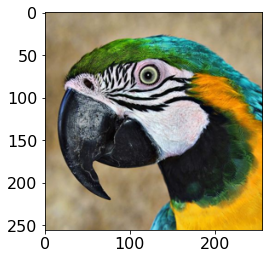

In [3]:
img=np.array(Image.open('./data/Set12/image.png').resize((256,256)), dtype=int)
print(img.shape)
imgplot = plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


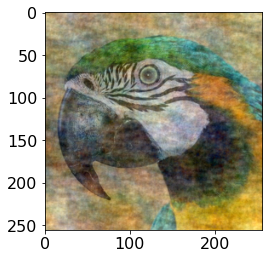

In [4]:
slice0 = img[:,:,0]
slice1 = img[:,:,1]
slice2 = img[:,:,2]

slice0_res = create_problem(img=img[:,:,0], H=256, W=256, sigma=1, filter_size=.015, filter_decay=1)
slice1_res = create_problem(img=img[:,:,1], H=256, W=256, sigma=1, filter_size=.015, filter_decay=1)
slice2_res = create_problem(img=img[:,:,2], H=256, W=256, sigma=1, filter_size=.015, filter_decay=1)

noisy = np.zeros((256,256,3), 'float')
noisy[:, :, 0] = slice0_res['noisy']
noisy[:, :, 1] = slice1_res['noisy']
noisy[:, :, 2] = slice2_res['noisy']

imgplot = plt.imshow(noisy)
plt.show()

In [5]:
z_slice0_cnn, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, 'cnn', eta=15000, tt=40, T2=15, mini_batch_size=10000, verbose=True)
z_slice1_cnn, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, 'cnn', eta=15000, tt=40, T2=15, mini_batch_size=10000, verbose=True)
z_slice2_cnn, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, 'cnn', eta=15000, tt=40, T2=15, mini_batch_size=10000, verbose=True)

After gradient update: 0 0 17.895417871591462
After denoising update: 0 0 16.68097502168687

After gradient update: 0 1 18.286244402187762
After denoising update: 0 1 18.055055556209965

After gradient update: 0 2 18.96691944786533
After denoising update: 0 2 17.90680768703841

After gradient update: 0 3 19.21833052395145
After denoising update: 0 3 19.116521020919365

After gradient update: 0 4 19.772414732955216
After denoising update: 0 4 19.301131919805638

After gradient update: 0 5 20.07811008911654
After denoising update: 0 5 19.763808770344138

After gradient update: 0 6 20.60417437580304
After denoising update: 0 6 20.294769489785203

After gradient update: 0 7 21.024985613503333
After denoising update: 0 7 20.65541991544931

After gradient update: 0 8 21.301492521898993
After denoising update: 0 8 20.9962186774818

After gradient update: 0 9 21.83398800704813
After denoising update: 0 9 21.464599422789007

After gradient update: 0 10 22.015528623137502
After denoising update:

After gradient update: 5 13 26.504904118002234
After denoising update: 5 13 26.504975061230702

After gradient update: 5 14 26.50427788083173
After denoising update: 5 14 26.50434132490841

After gradient update: 0 0 19.633495230241312
After denoising update: 0 0 17.241936873599833

After gradient update: 0 1 18.770925477646443
After denoising update: 0 1 18.269985397143323

After gradient update: 0 2 19.265186310378486
After denoising update: 0 2 18.295297417436945

After gradient update: 0 3 19.760373339597137
After denoising update: 0 3 19.060957937978078

After gradient update: 0 4 19.96817173008379
After denoising update: 0 4 19.38198456361356

After gradient update: 0 5 20.54182597844712
After denoising update: 0 5 20.18060907668531

After gradient update: 0 6 21.013706003097788
After denoising update: 0 6 20.438768365197934

After gradient update: 0 7 21.361418078841883
After denoising update: 0 7 20.891064803312055

After gradient update: 0 8 21.73542117676206
After denoising u

After gradient update: 5 11 25.884983975956075
After denoising update: 5 11 25.885084979797806

After gradient update: 5 12 25.835363323822598
After denoising update: 5 12 25.835461801111208

After gradient update: 5 13 25.776853853831412
After denoising update: 5 13 25.776952275038706

After gradient update: 5 14 25.713453979392995
After denoising update: 5 14 25.71354994464036

After gradient update: 6 0 25.9144698595237
After denoising update: 6 0 25.914533674718356

After gradient update: 0 0 19.06771167152645
After denoising update: 0 0 17.379909230268748

After gradient update: 0 1 19.10696007391688
After denoising update: 0 1 18.834751706233895

After gradient update: 0 2 19.53902296599947
After denoising update: 0 2 18.1354556375998

After gradient update: 0 3 19.61988303322418
After denoising update: 0 3 19.56953682673148

After gradient update: 0 4 20.568638552835363
After denoising update: 0 4 20.474898707944334

After gradient update: 0 5 21.5601126120181
After denoising up

After gradient update: 5 8 27.634211407764305
After denoising update: 5 8 27.634365197068913

After gradient update: 5 9 27.640948234142087
After denoising update: 5 9 27.64108715135102

After gradient update: 5 10 27.63514481866016
After denoising update: 5 10 27.635271954089575

After gradient update: 5 11 27.642565343292897
After denoising update: 5 11 27.642679287833225

After gradient update: 5 12 27.635066847309353
After denoising update: 5 12 27.635169065555658

After gradient update: 5 13 27.64004613951554
After denoising update: 5 13 27.64013836263441

After gradient update: 5 14 27.64019563602136
After denoising update: 5 14 27.640278787879925

After gradient update: 6 0 27.647799742490257
After denoising update: 6 0 27.64787383806417



In [6]:
z_slice0_bm3d, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, 'bm3d', eta=19000, tt=500, T2=5, mini_batch_size=10000, verbose=True)
z_slice1_bm3d, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, 'bm3d', eta=19000, tt=500, T2=5, mini_batch_size=10000, verbose=True)
z_slice2_bm3d, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, 'bm3d', eta=19000, tt=500, T2=5, mini_batch_size=10000, verbose=True)

After gradient update: 0 0 18.207321569057886
After denoising update: 0 0 18.226786763817486

After gradient update: 0 1 19.19065735950636
After denoising update: 0 1 19.205028149628674

After gradient update: 0 2 19.46733840618694
After denoising update: 0 2 19.480779285533245

After gradient update: 0 3 19.130372408199058
After denoising update: 0 3 19.141870617038798

After gradient update: 0 4 19.189792013886795
After denoising update: 0 4 19.201093166839602

After gradient update: 1 0 19.931530076500902
After denoising update: 1 0 19.9372431614743

After gradient update: 1 1 20.27030621979655
After denoising update: 1 1 20.27453302179196

After gradient update: 1 2 20.017137950187767
After denoising update: 1 2 20.020018989333927

After gradient update: 1 3 20.49824762491567
After denoising update: 1 3 20.500739646186755

After gradient update: 1 4 20.38960458562146
After denoising update: 1 4 20.39115481093926

After gradient update: 2 0 20.620358399725372
After denoising update:

After denoising update: 17 2 21.792690182261325

After gradient update: 17 3 21.83552910120778
After denoising update: 17 3 21.80165906841524

After gradient update: 17 4 21.84424950668706
After denoising update: 17 4 21.81013223025413

After gradient update: 18 0 21.853971951028615
After denoising update: 18 0 21.819608000757917

After gradient update: 18 1 21.86326550567486
After denoising update: 18 1 21.828658732489448

After gradient update: 18 2 21.871808275291883
After denoising update: 18 2 21.836878486702357

After gradient update: 18 3 21.880718306980054
After denoising update: 18 3 21.845641286845495

After gradient update: 18 4 21.888875029236253
After denoising update: 18 4 21.85360612566495

After gradient update: 19 0 21.89918890478554
After denoising update: 19 0 21.863658788419542

After gradient update: 19 1 21.908510117477817
After denoising update: 19 1 21.872742371186114

After gradient update: 19 2 21.916872541036774
After denoising update: 19 2 21.88094728427412


After gradient update: 34 4 22.49852166507129
After denoising update: 34 4 22.44872793378618

After gradient update: 35 0 22.50492618968101
After denoising update: 35 0 22.454884483255185

After gradient update: 35 1 22.511226490975847
After denoising update: 35 1 22.461046616160925

After gradient update: 35 2 22.51751598665833
After denoising update: 35 2 22.467084506271952

After gradient update: 35 3 22.52371055238814
After denoising update: 35 3 22.473063382819824

After gradient update: 35 4 22.529818309139905
After denoising update: 35 4 22.47905858630238

After gradient update: 36 0 22.535964676306662
After denoising update: 36 0 22.485070853825473

After gradient update: 36 1 22.542100671676188
After denoising update: 36 1 22.49110071865129

After gradient update: 36 2 22.54826093127769
After denoising update: 36 2 22.497060883834763

After gradient update: 36 3 22.554377302588918
After denoising update: 36 3 22.50305828904789

After gradient update: 36 4 22.560495256469537
Af

After gradient update: 52 0 22.9803662152133
After denoising update: 52 0 22.919138809245272

After gradient update: 52 1 22.985306193348997
After denoising update: 52 1 22.92400151557691

After gradient update: 52 2 22.99028237403823
After denoising update: 52 2 22.92887484484195

After gradient update: 52 3 22.995233669523483
After denoising update: 52 3 22.93372619764925

After gradient update: 52 4 23.000205439932383
After denoising update: 52 4 22.938562601266078

After gradient update: 53 0 23.005153863157393
After denoising update: 53 0 22.94330892949776

After gradient update: 53 1 23.009986462315958
After denoising update: 53 1 22.94804400172122

After gradient update: 53 2 23.014810552214023
After denoising update: 53 2 22.95284418394296

After gradient update: 53 3 23.01970982116977
After denoising update: 53 3 22.957608718319808

After gradient update: 53 4 23.024576036379134
After denoising update: 53 4 22.96237525424429

After gradient update: 54 0 23.029460811253305
Afte

After denoising update: 13 1 23.076028039672636

After gradient update: 13 2 23.129666805180904
After denoising update: 13 2 23.089217069612662

After gradient update: 13 3 23.142349638602045
After denoising update: 13 3 23.101396836420406

After gradient update: 13 4 23.15560940063039
After denoising update: 13 4 23.114341750518072

After gradient update: 14 0 23.16858969765148
After denoising update: 14 0 23.126901699025485

After gradient update: 14 1 23.181246196766704
After denoising update: 14 1 23.139236202603207

After gradient update: 14 2 23.193989179990567
After denoising update: 14 2 23.15173407602503

After gradient update: 14 3 23.206712317179733
After denoising update: 14 3 23.164129707869275

After gradient update: 14 4 23.219289421745447
After denoising update: 14 4 23.176345034379885

After gradient update: 15 0 23.23195018360719
After denoising update: 15 0 23.188650618100386

After gradient update: 15 1 23.24439928097245
After denoising update: 15 1 23.2007114817775

After gradient update: 30 3 24.002153462619678
After denoising update: 30 3 23.93683658503319

After gradient update: 30 4 24.010185085754326
After denoising update: 30 4 23.944567454941673

After gradient update: 31 0 24.01815707965911
After denoising update: 31 0 23.95240636435011

After gradient update: 31 1 24.0261762824278
After denoising update: 31 1 23.96011305478038

After gradient update: 31 2 24.034069604119644
After denoising update: 31 2 23.967703092300777

After gradient update: 31 3 24.04188740150278
After denoising update: 31 3 23.97524802766567

After gradient update: 31 4 24.049616363154666
After denoising update: 31 4 23.982799186184245

After gradient update: 32 0 24.057407362676287
After denoising update: 32 0 23.990196236037363

After gradient update: 32 1 24.06499793580121
After denoising update: 32 1 23.997547780189596

After gradient update: 32 2 24.07253634233047
After denoising update: 32 2 24.004859328246646

After gradient update: 32 3 24.080042922522175
Aft

After denoising update: 47 4 24.484054545932107

After gradient update: 48 0 24.572702846669227
After denoising update: 48 0 24.489650664872546

After gradient update: 48 1 24.57846690152856
After denoising update: 48 1 24.495240140697337

After gradient update: 48 2 24.584233779680964
After denoising update: 48 2 24.50080483140197

After gradient update: 48 3 24.58996166148436
After denoising update: 48 3 24.506315466645376

After gradient update: 48 4 24.59564268138166
After denoising update: 48 4 24.511951847185735

After gradient update: 49 0 24.60145718888349
After denoising update: 49 0 24.517484402126904

After gradient update: 49 1 24.60716774169599
After denoising update: 49 1 24.523100651096588

After gradient update: 49 2 24.612920137292328
After denoising update: 49 2 24.528670546951382

After gradient update: 49 3 24.618666985630387
After denoising update: 49 3 24.534212930702477

After gradient update: 49 4 24.624390614193757
After denoising update: 49 4 24.53977360385255

After denoising update: 9 1 22.453225197794442

After gradient update: 9 2 21.746126688215565
After denoising update: 9 2 21.7167866802243

After gradient update: 9 3 18.67378188309176
After denoising update: 9 3 18.659101093897842

After gradient update: 9 4 20.27870260747445
After denoising update: 9 4 20.25717042531162

After gradient update: 10 0 22.011279956853702
After denoising update: 10 0 21.979174324595434

After gradient update: 10 1 20.67370350028355
After denoising update: 10 1 20.649841760791542

After gradient update: 10 2 21.816503191402795
After denoising update: 10 2 21.78509213906831

After gradient update: 10 3 20.936623181433557
After denoising update: 10 3 20.910776224260413

After gradient update: 10 4 22.41539875889756
After denoising update: 10 4 22.37868277275063

After gradient update: 11 0 22.60358174880335
After denoising update: 11 0 22.56503946898262

After gradient update: 11 1 22.488547205982247
After denoising update: 11 1 22.450721043308782

After gra

After gradient update: 26 3 23.523924985706874
After denoising update: 26 3 23.459578920544324

After gradient update: 26 4 23.510097906297418
After denoising update: 26 4 23.445771920494046

After gradient update: 27 0 23.550583085499692
After denoising update: 27 0 23.48542779516586

After gradient update: 27 1 23.5696563052335
After denoising update: 27 1 23.504115205361586

After gradient update: 27 2 23.56722800112282
After denoising update: 27 2 23.501752258823274

After gradient update: 27 3 23.543535724136188
After denoising update: 27 3 23.47815569250593

After gradient update: 27 4 23.498691877628765
After denoising update: 27 4 23.43368158944857

After gradient update: 28 0 23.581009190216914
After denoising update: 28 0 23.514735878913534

After gradient update: 28 1 23.613762667765524
After denoising update: 28 1 23.546635288581264

After gradient update: 28 2 23.595665869485266
After denoising update: 28 2 23.528746137587483

After gradient update: 28 3 23.41895795464214


After denoising update: 43 4 24.079996571721686

After gradient update: 44 0 24.170343997985132
After denoising update: 44 0 24.085306819902286

After gradient update: 44 1 24.175769671149947
After denoising update: 44 1 24.09048519861193

After gradient update: 44 2 24.181077477497613
After denoising update: 44 2 24.095723798409452

After gradient update: 44 3 24.186429658235248
After denoising update: 44 3 24.100834259333812

After gradient update: 44 4 24.191692989824958
After denoising update: 44 4 24.10596049123114

After gradient update: 45 0 24.196961288470465
After denoising update: 45 0 24.111086155897894

After gradient update: 45 1 24.20220535332732
After denoising update: 45 1 24.11615013952906

After gradient update: 45 2 24.20741666400791
After denoising update: 45 2 24.121246286268722

After gradient update: 45 3 24.212641301564855
After denoising update: 45 3 24.126257985944193

After gradient update: 45 4 24.217797546756728
After denoising update: 45 4 24.1312944427740

In [7]:
z_slice0_tv, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, 'tv', eta=17000, tt=500, T2=15, mini_batch_size=15000, verbose=True)
z_slice1_tv, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, 'tv', eta=17000, tt=500, T2=15, mini_batch_size=15000, verbose=True)
z_slice2_tv, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, 'tv', eta=17000, tt=500, T2=15, mini_batch_size=15000, verbose=True)

After gradient update: 0 0 18.052073379485968
After denoising update: 0 0 18.012982558264056

After gradient update: 0 1 18.956065672620262
After denoising update: 0 1 18.938545044969956

After gradient update: 0 2 19.367519818000957
After denoising update: 0 2 19.351012390388128

After gradient update: 0 3 19.754705133766773
After denoising update: 0 3 19.742250464862934

After gradient update: 0 4 20.014246963978962
After denoising update: 0 4 20.00558481883047

After gradient update: 0 5 20.041907683919298
After denoising update: 0 5 20.036885228307973

After gradient update: 0 6 20.10456307640453
After denoising update: 0 6 20.102800763935058

After gradient update: 0 7 20.26020343124167
After denoising update: 0 7 20.25991256633272

After gradient update: 0 8 19.984072424951982
After denoising update: 0 8 19.984429782033995

After gradient update: 0 9 19.65486138611469
After denoising update: 0 9 19.65592169201221

After gradient update: 0 10 19.272931478095636
After denoising upd

After denoising update: 5 12 21.605309282165294

After gradient update: 5 13 21.61020994800137
After denoising update: 5 13 21.61051732707186

After gradient update: 5 14 21.615314847293256
After denoising update: 5 14 21.615573852608097

After gradient update: 6 0 21.620367312022765
After denoising update: 6 0 21.62058516806075

After gradient update: 6 1 21.625329479110782
After denoising update: 6 1 21.625549183220556

After gradient update: 6 2 21.630258280787324
After denoising update: 6 2 21.63048134248568

After gradient update: 6 3 21.635155869671863
After denoising update: 6 3 21.63537164468832

After gradient update: 6 4 21.640007611354434
After denoising update: 6 4 21.640211391545968

After gradient update: 6 5 21.644821002912344
After denoising update: 6 5 21.645030498224067

After gradient update: 6 6 21.649625632054533
After denoising update: 6 6 21.64984195902425

After gradient update: 6 7 21.654405883347682
After denoising update: 6 7 21.654620163187822

After gradien

After denoising update: 11 9 21.948798571340195

After gradient update: 11 10 21.952273462196445
After denoising update: 11 10 21.951887630749802

After gradient update: 11 11 21.955357289528493
After denoising update: 11 11 21.954963749519028

After gradient update: 11 12 21.958426580428423
After denoising update: 11 12 21.958020077696432

After gradient update: 11 13 21.96147935245495
After denoising update: 11 13 21.961060313763568

After gradient update: 11 14 21.96451324938989
After denoising update: 11 14 21.964104458878595

After gradient update: 12 0 21.967547891152222
After denoising update: 12 0 21.967132682422623

After gradient update: 12 1 21.970570753294112
After denoising update: 12 1 21.97015424853784

After gradient update: 12 2 21.9735881259175
After denoising update: 12 2 21.97316510613602

After gradient update: 12 3 21.976593227636222
After denoising update: 12 3 21.976162380088155

After gradient update: 12 4 21.979583957175066
After denoising update: 12 4 21.9791

After gradient update: 17 5 22.17712717088302
After denoising update: 17 5 22.176404953080322

After gradient update: 17 6 22.179385910181754
After denoising update: 17 6 22.178663149419226

After gradient update: 17 7 22.181640398791544
After denoising update: 17 7 22.18090691302085

After gradient update: 17 8 22.183878461113466
After denoising update: 17 8 22.18313889631451

After gradient update: 17 9 22.186108663371815
After denoising update: 17 9 22.185368667704935

After gradient update: 17 10 22.188332574688495
After denoising update: 17 10 22.187592334316303

After gradient update: 17 11 22.19055323339363
After denoising update: 17 11 22.18980833616818

After gradient update: 17 12 22.192767012192263
After denoising update: 17 12 22.192023624840523

After gradient update: 17 13 22.194975359130247
After denoising update: 17 13 22.194234178758073

After gradient update: 17 14 22.197181744249658
After denoising update: 17 14 22.196427063278964

After gradient update: 18 0 22.1993

After denoising update: 23 0 22.345465879198372

After gradient update: 23 1 22.348207796147733
After denoising update: 23 1 22.34724073196846

After gradient update: 23 2 22.349980525239282
After denoising update: 23 2 22.349011930168533

After gradient update: 23 3 22.351749323536744
After denoising update: 23 3 22.35077878265356

After gradient update: 23 4 22.353514114547608
After denoising update: 23 4 22.352540401464317

After gradient update: 23 5 22.355273637228173
After denoising update: 23 5 22.354297784848768

After gradient update: 23 6 22.357028719314833
After denoising update: 23 6 22.356049553249868

After gradient update: 23 7 22.358778138092372
After denoising update: 23 7 22.357798394576452

After gradient update: 23 8 22.360524500170737
After denoising update: 23 8 22.359541773819704

After gradient update: 23 9 22.36226622969554
After denoising update: 23 9 22.361279320426473

After gradient update: 23 10 22.36400128706213
After denoising update: 23 10 22.3630151204

After gradient update: 28 11 22.484628836351632
After denoising update: 28 11 22.483545709243998

After gradient update: 28 12 22.48608355176514
After denoising update: 28 12 22.484998635287567

After gradient update: 28 13 22.487534660661005
After denoising update: 28 13 22.48644587318112

After gradient update: 28 14 22.488979826432534
After denoising update: 28 14 22.487896299844763

After gradient update: 29 0 22.490428009246017
After denoising update: 29 0 22.489339787214774

After gradient update: 29 1 22.491869000338873
After denoising update: 29 1 22.490778489913346

After gradient update: 29 2 22.493305059606705
After denoising update: 29 2 22.492213095315382

After gradient update: 29 3 22.49473714614402
After denoising update: 29 3 22.49364248443794

After gradient update: 29 4 22.496164031199765
After denoising update: 29 4 22.4950683608877

After gradient update: 29 5 22.497587353439723
After denoising update: 29 5 22.496490948742686

After gradient update: 29 6 22.4990068

After denoising update: 34 6 22.595686177063065

After gradient update: 34 7 22.598051148021337
After denoising update: 34 7 22.596886202638338

After gradient update: 34 8 22.599248840054035
After denoising update: 34 8 22.598082976967806

After gradient update: 34 9 22.600443661734705
After denoising update: 34 9 22.599276099161465

After gradient update: 34 10 22.601634670627217
After denoising update: 34 10 22.600467301091363

After gradient update: 34 11 22.602824083048336
After denoising update: 34 11 22.601656457503925

After gradient update: 34 12 22.6040106297716
After denoising update: 34 12 22.60284170273949

After gradient update: 34 13 22.605194424571255
After denoising update: 34 13 22.60402552258126

After gradient update: 34 14 22.606375800931477
After denoising update: 34 14 22.60520600156895

After gradient update: 35 0 22.607554256879695
After denoising update: 35 0 22.606383602864245

After gradient update: 35 1 22.60872970994409
After denoising update: 35 1 22.6075

After gradient update: 40 2 22.69173739717737
After denoising update: 40 2 22.690576338588812

After gradient update: 40 3 22.692756717478034
After denoising update: 40 3 22.691595792606893

After gradient update: 40 4 22.693774305375747
After denoising update: 40 4 22.692613888566267

After gradient update: 40 5 22.694790546404647
After denoising update: 40 5 22.693629376135135

After gradient update: 40 6 22.695803981978205
After denoising update: 40 6 22.694642898445373

After gradient update: 40 7 22.696815986742983
After denoising update: 40 7 22.695654368491176

After gradient update: 40 8 22.697825269261823
After denoising update: 40 8 22.696662892041417

After gradient update: 40 9 22.698831921609436
After denoising update: 40 9 22.697671068396232

After gradient update: 40 10 22.699838042501227
After denoising update: 40 10 22.698676947811354

After gradient update: 40 11 22.700841454325822
After denoising update: 40 11 22.69967904560632

After gradient update: 40 12 22.701842

After gradient update: 1 1 22.084742825646508
After denoising update: 1 1 22.07777788175068

After gradient update: 1 2 22.169054839968094
After denoising update: 1 2 22.163150186173187

After gradient update: 1 3 22.22825039230059
After denoising update: 1 3 22.223499047134926

After gradient update: 1 4 22.261046723481055
After denoising update: 1 4 22.2574917968442

After gradient update: 1 5 22.274180130458593
After denoising update: 1 5 22.271868958250217

After gradient update: 1 6 22.278549540675886
After denoising update: 1 6 22.27644605050491

After gradient update: 1 7 22.270270349197684
After denoising update: 1 7 22.269208963026568

After gradient update: 1 8 22.239537447642476
After denoising update: 1 8 22.238786775964492

After gradient update: 1 9 22.339175245415582
After denoising update: 1 9 22.33837859274203

After gradient update: 1 10 22.316864357257785
After denoising update: 1 10 22.316757593117554

After gradient update: 1 11 22.31937990326122
After denoising up

After denoising update: 6 13 23.041247433407417

After gradient update: 6 14 23.04787695196076
After denoising update: 6 14 23.04614680844946

After gradient update: 7 0 23.05273990270503
After denoising update: 7 0 23.05098582469748

After gradient update: 7 1 23.05754361900202
After denoising update: 7 1 23.05577229765516

After gradient update: 7 2 23.062301793000813
After denoising update: 7 2 23.060520114572753

After gradient update: 7 3 23.06702243451177
After denoising update: 7 3 23.065239572949988

After gradient update: 7 4 23.07171573213697
After denoising update: 7 4 23.069921249661874

After gradient update: 7 5 23.076377211925426
After denoising update: 7 5 23.074571004495507

After gradient update: 7 6 23.081008554455767
After denoising update: 7 6 23.07920522110974

After gradient update: 7 7 23.085617480964466
After denoising update: 7 7 23.083802195943814

After gradient update: 7 8 23.09018945670722
After denoising update: 7 8 23.088387271671383

After gradient upda

After denoising update: 12 10 23.36828123527006

After gradient update: 12 11 23.373588966895696
After denoising update: 12 11 23.371241670353594

After gradient update: 12 12 23.376544438770313
After denoising update: 12 12 23.374181873655825

After gradient update: 12 13 23.379473573321427
After denoising update: 12 13 23.377108948530775

After gradient update: 12 14 23.38239640128984
After denoising update: 12 14 23.380020096654512

After gradient update: 13 0 23.385298604626644
After denoising update: 13 0 23.382910756718104

After gradient update: 13 1 23.3881818276714
After denoising update: 13 1 23.385783436150398

After gradient update: 13 2 23.39104644308991
After denoising update: 13 2 23.388644343691677

After gradient update: 13 3 23.39389851405155
After denoising update: 13 3 23.39148831817225

After gradient update: 13 4 23.39673687942208
After denoising update: 13 4 23.394320256975277

After gradient update: 13 5 23.399559268879667
After denoising update: 13 5 23.3971401

After gradient update: 18 6 23.582541506596396
After denoising update: 18 6 23.579937420524118

After gradient update: 18 7 23.584600795474593
After denoising update: 18 7 23.582007794126397

After gradient update: 18 8 23.586663548795343
After denoising update: 18 8 23.584054288641234

After gradient update: 18 9 23.58870027776481
After denoising update: 18 9 23.586085162400604

After gradient update: 18 10 23.59072611097192
After denoising update: 18 10 23.588116337650703

After gradient update: 18 11 23.592746302211918
After denoising update: 18 11 23.59014358986068

After gradient update: 18 12 23.594773476907793
After denoising update: 18 12 23.592163708948558

After gradient update: 18 13 23.596784030127303
After denoising update: 18 13 23.59417163465139

After gradient update: 18 14 23.598789790678172
After denoising update: 18 14 23.596169372444166

After gradient update: 19 0 23.60077939156251
After denoising update: 19 0 23.598160780916952

After gradient update: 19 1 23.6027

After denoising update: 24 1 23.730645362875592

After gradient update: 24 2 23.734996261203847
After denoising update: 24 2 23.73217982951392

After gradient update: 24 3 23.73652758417083
After denoising update: 24 3 23.733708331767573

After gradient update: 24 4 23.738052727277264
After denoising update: 24 4 23.73522983209959

After gradient update: 24 5 23.739571774857588
After denoising update: 24 5 23.736742629314797

After gradient update: 24 6 23.741082028227495
After denoising update: 24 6 23.73825029348115

After gradient update: 24 7 23.74258752099269
After denoising update: 24 7 23.7397511681852

After gradient update: 24 8 23.744084872477735
After denoising update: 24 8 23.74124734540931

After gradient update: 24 9 23.745578231530466
After denoising update: 24 9 23.742737762868302

After gradient update: 24 10 23.7470679316188
After denoising update: 24 10 23.744224281452098

After gradient update: 24 11 23.7485515028989
After denoising update: 24 11 23.745696659298353


After gradient update: 29 12 23.84876810084048
After denoising update: 29 12 23.84581247501756

After gradient update: 29 13 23.849952648388605
After denoising update: 29 13 23.846997111455188

After gradient update: 29 14 23.85113455753487
After denoising update: 29 14 23.848178138019396

After gradient update: 30 0 23.852313494583694
After denoising update: 30 0 23.849355823741018

After gradient update: 30 1 23.85348881885689
After denoising update: 30 1 23.850531610958576

After gradient update: 30 2 23.854662038073137
After denoising update: 30 2 23.851704882885425

After gradient update: 30 3 23.855832711675767
After denoising update: 30 3 23.85287583492562

After gradient update: 30 4 23.857000845104697
After denoising update: 30 4 23.854042556941156

After gradient update: 30 5 23.85816495233791
After denoising update: 30 5 23.85520701483291

After gradient update: 30 6 23.85932674688702
After denoising update: 30 6 23.85636880162008

After gradient update: 30 7 23.860485498805

After gradient update: 35 8 23.940528039170225
After denoising update: 35 8 23.9375334914355

After gradient update: 35 9 23.941475099269223
After denoising update: 35 9 23.938479258868743

After gradient update: 35 10 23.942418455394673
After denoising update: 35 10 23.93942287117039

After gradient update: 35 11 23.943359695031198
After denoising update: 35 11 23.940364288196058

After gradient update: 35 12 23.944297599817222
After denoising update: 35 12 23.94129961915646

After gradient update: 35 13 23.94523053859741
After denoising update: 35 13 23.94223270794454

After gradient update: 35 14 23.946160742472046
After denoising update: 35 14 23.943163912873608

After gradient update: 36 0 23.947089246777065
After denoising update: 36 0 23.944094312392593

After gradient update: 36 1 23.94801694063493
After denoising update: 36 1 23.9450229634793

After gradient update: 36 2 23.948942801638644
After denoising update: 36 2 23.94594957848344

After gradient update: 36 3 23.949866509

After denoising update: 41 3 24.011996747518126

After gradient update: 41 4 24.01565204167887
After denoising update: 41 4 24.01280349701256

After gradient update: 41 5 24.016457227904873
After denoising update: 41 5 24.013609731233498

After gradient update: 41 6 24.017262255369744
After denoising update: 41 6 24.01441425590577

After gradient update: 41 7 24.018065332892743
After denoising update: 41 7 24.015215962372288

After gradient update: 41 8 24.018865532779323
After denoising update: 41 8 24.01601720716782

After gradient update: 41 9 24.0196655550848
After denoising update: 41 9 24.01681582459492

After gradient update: 41 10 24.020462698003662
After denoising update: 41 10 24.01761371380658

After gradient update: 41 11 24.02125980442476
After denoising update: 41 11 24.018410290602684

After gradient update: 41 12 24.022054586638056
After denoising update: 41 12 24.01920595610978

After gradient update: 41 13 24.022848693424926
After denoising update: 41 13 24.0199981811

After gradient update: 2 3 22.25113340163854
After denoising update: 2 3 22.249873832509945

After gradient update: 2 4 22.266358101613232
After denoising update: 2 4 22.26515786466352

After gradient update: 2 5 22.278981345444045
After denoising update: 2 5 22.278196679825108

After gradient update: 2 6 22.290896601681055
After denoising update: 2 6 22.29006258009882

After gradient update: 2 7 22.297095921620105
After denoising update: 2 7 22.29625884051623

After gradient update: 2 8 22.297301360337542
After denoising update: 2 8 22.296882224864156

After gradient update: 2 9 22.30731896556403
After denoising update: 2 9 22.30694789717283

After gradient update: 2 10 22.311561135805032
After denoising update: 2 10 22.31147411482937

After gradient update: 2 11 22.311975928069394
After denoising update: 2 11 22.311842721294365

After gradient update: 2 12 22.31151705604901
After denoising update: 2 12 22.311154910881132

After gradient update: 2 13 22.352960521733934
After denoising

After denoising update: 8 0 22.79591411391462

After gradient update: 8 1 22.80069597377998
After denoising update: 8 1 22.799859779656092

After gradient update: 8 2 22.80461622054572
After denoising update: 8 2 22.80377471846365

After gradient update: 8 3 22.808501150851413
After denoising update: 8 3 22.807662422130615

After gradient update: 8 4 22.812357933606716
After denoising update: 8 4 22.811500736773283

After gradient update: 8 5 22.816168386627265
After denoising update: 8 5 22.81531725900409

After gradient update: 8 6 22.81995296119249
After denoising update: 8 6 22.819065895926872

After gradient update: 8 7 22.823675212156587
After denoising update: 8 7 22.8228045800909

After gradient update: 8 8 22.82738674131936
After denoising update: 8 8 22.82648752777189

After gradient update: 8 9 22.83105452584622
After denoising update: 8 9 22.830168816285315

After gradient update: 8 10 22.83471864103179
After denoising update: 8 10 22.8338432415634

After gradient update: 8

After gradient update: 13 12 23.066198329448202
After denoising update: 13 12 23.06488669850082

After gradient update: 13 13 23.068692061675055
After denoising update: 13 13 23.067383211569698

After gradient update: 13 14 23.071179795269302
After denoising update: 13 14 23.06987065641183

After gradient update: 14 0 23.073666864472607
After denoising update: 14 0 23.07235120360888

After gradient update: 14 1 23.076142270854305
After denoising update: 14 1 23.074823687607854

After gradient update: 14 2 23.078609708080158
After denoising update: 14 2 23.077285556104165

After gradient update: 14 3 23.08106659489016
After denoising update: 14 3 23.079738622109154

After gradient update: 14 4 23.083515683329345
After denoising update: 14 4 23.082177332290073

After gradient update: 14 5 23.085948536891753
After denoising update: 14 5 23.084608121603537

After gradient update: 14 6 23.088374555426128
After denoising update: 14 6 23.087028476185942

After gradient update: 14 7 23.0907904

After denoising update: 19 7 23.245952822004938

After gradient update: 19 8 23.24922327032901
After denoising update: 19 8 23.247807549023115

After gradient update: 19 9 23.251068464775997
After denoising update: 19 9 23.249642468079553

After gradient update: 19 10 23.25289382174158
After denoising update: 19 10 23.2514739496594

After gradient update: 19 11 23.25471378785792
After denoising update: 19 11 23.25330903588734

After gradient update: 19 12 23.256545076336884
After denoising update: 19 12 23.255120160756384

After gradient update: 19 13 23.258348386350626
After denoising update: 19 13 23.25691510826943

After gradient update: 19 14 23.260134608417225
After denoising update: 19 14 23.258710823885757

After gradient update: 20 0 23.261927276711315
After denoising update: 20 0 23.260500202217482

After gradient update: 20 1 23.26371244585824
After denoising update: 20 1 23.262284907761682

After gradient update: 20 2 23.26549365457508
After denoising update: 20 2 23.2640648

After gradient update: 25 3 23.38464208434698
After denoising update: 25 3 23.38310154730173

After gradient update: 25 4 23.3860244642711
After denoising update: 25 4 23.384481863669386

After gradient update: 25 5 23.387402152556128
After denoising update: 25 5 23.385857656955856

After gradient update: 25 6 23.38877633520754
After denoising update: 25 6 23.38722823588735

After gradient update: 25 7 23.390144592576924
After denoising update: 25 7 23.38859789025086

After gradient update: 25 8 23.391511317211577
After denoising update: 25 8 23.38996355412724

After gradient update: 25 9 23.392874756502174
After denoising update: 25 9 23.391326371154957

After gradient update: 25 10 23.394235132362414
After denoising update: 25 10 23.392687012222307

After gradient update: 25 11 23.395593336640204
After denoising update: 25 11 23.394044496284163

After gradient update: 25 12 23.396948632593265
After denoising update: 25 12 23.395402090876885

After gradient update: 25 13 23.3983036311

After denoising update: 30 13 23.48700909898325

After gradient update: 30 14 23.489738094807894
After denoising update: 30 14 23.488080896524515

After gradient update: 31 0 23.490808096764347
After denoising update: 31 0 23.4891476112888

After gradient update: 31 1 23.49187360050315
After denoising update: 31 1 23.49021113807232

After gradient update: 31 2 23.492935972160232
After denoising update: 31 2 23.491271408571155

After gradient update: 31 3 23.493994832969577
After denoising update: 31 3 23.492328995294084

After gradient update: 31 4 23.495051276646528
After denoising update: 31 4 23.493383874152318

After gradient update: 31 5 23.496104784740602
After denoising update: 31 5 23.494436305806552

After gradient update: 31 6 23.497155810305678
After denoising update: 31 6 23.495484317060633

After gradient update: 31 7 23.49820260877765
After denoising update: 31 7 23.496530959827

After gradient update: 31 8 23.499246808543287
After denoising update: 31 8 23.49757151586338

After gradient update: 36 9 23.571699676813495
After denoising update: 36 9 23.5699520195344

After gradient update: 36 10 23.57257722215121
After denoising update: 36 10 23.57083063954475

After gradient update: 36 11 23.57345419691439
After denoising update: 36 11 23.571708796004643

After gradient update: 36 12 23.574331893422688
After denoising update: 36 12 23.572583642420582

After gradient update: 36 13 23.57520504240291
After denoising update: 36 13 23.57345569277101

After gradient update: 36 14 23.576075869927724
After denoising update: 36 14 23.574323607256915

After gradient update: 37 0 23.576942200289746
After denoising update: 37 0 23.575190686538832

After gradient update: 37 1 23.577807966766365
After denoising update: 37 1 23.576055902975295

After gradient update: 37 2 23.578671928750214
After denoising update: 37 2 23.576919257493746

After gradient update: 37 3 23.579534102863406
After denoising update: 37 3 23.577781001685754

After gradient update: 37 4 23.580394

After denoising update: 42 4 23.637826130179338

After gradient update: 42 5 23.640332027580463
After denoising update: 42 5 23.63854905839489

After gradient update: 42 6 23.641053740996007
After denoising update: 42 6 23.63927096536416

After gradient update: 42 7 23.641773741556737
After denoising update: 42 7 23.639991692417897

After gradient update: 42 8 23.642492589406686
After denoising update: 42 8 23.64071092073449

After gradient update: 42 9 23.643210096200796
After denoising update: 42 9 23.64142818730727

After gradient update: 42 10 23.64392588583481
After denoising update: 42 10 23.64214502253898

After gradient update: 42 11 23.64464102396481
After denoising update: 42 11 23.642860713140884

After gradient update: 42 12 23.645354749682244
After denoising update: 42 12 23.643573730820645

After gradient update: 42 13 23.646066608712516
After denoising update: 42 13 23.644284717534838

After gradient update: 42 14 23.646775722521166
After denoising update: 42 14 23.64499

In [8]:
z_slice0_nlm, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, 'nlm', eta=3000, tt=200, T2=15, mini_batch_size=5000, verbose=True)
z_slice1_nlm, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, 'nlm', eta=3000, tt=200, T2=15, mini_batch_size=5000, verbose=True)
z_slice2_nlm, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, 'nlm', eta=3000, tt=200, T2=15, mini_batch_size=5000, verbose=True)

After gradient update: 0 0 16.942811439183206
After denoising update: 0 0 16.975811692982777

After gradient update: 0 1 17.200855035438963
After denoising update: 0 1 17.23180372702573

After gradient update: 0 2 17.46615467481045
After denoising update: 0 2 17.492908558707324

After gradient update: 0 3 17.663181783873394
After denoising update: 0 3 17.685772327827625

After gradient update: 0 4 17.888726350346815
After denoising update: 0 4 17.90946744940286

After gradient update: 0 5 18.11903468978385
After denoising update: 0 5 18.13840139884466

After gradient update: 0 6 18.35084450560458
After denoising update: 0 6 18.368127525209097

After gradient update: 0 7 18.58201410392581
After denoising update: 0 7 18.59791273093236

After gradient update: 0 8 18.821294632364726
After denoising update: 0 8 18.83634785697541

After gradient update: 0 9 19.045541726545842
After denoising update: 0 9 19.05984253338765

After gradient update: 0 10 19.23120765310092
After denoising update: 

After gradient update: 5 13 24.49905346294768
After denoising update: 5 13 24.44648913412857

After gradient update: 5 14 24.535016756997962
After denoising update: 5 14 24.48168337204705

After gradient update: 6 0 24.571679541400023
After denoising update: 6 0 24.51699900841113

After gradient update: 6 1 24.607382936842576
After denoising update: 6 1 24.55157227430016

After gradient update: 6 2 24.64234590232197
After denoising update: 6 2 24.585410045745725

After gradient update: 6 3 24.67669519849268
After denoising update: 6 3 24.6194457121713

After gradient update: 6 4 24.71080481917809
After denoising update: 6 4 24.65297767600694

After gradient update: 6 5 24.74484487126404
After denoising update: 6 5 24.686167934047255

After gradient update: 6 6 24.778824450258746
After denoising update: 6 6 24.71940093900264

After gradient update: 6 7 24.81262315198055
After denoising update: 6 7 24.752456556761942

After gradient update: 6 8 24.84600388273012
After denoising update: 6

After gradient update: 11 10 26.749607853802143
After denoising update: 11 10 26.64674561225848

After gradient update: 11 11 26.76664119431422
After denoising update: 11 11 26.663717445708475

After gradient update: 11 12 26.784602999241073
After denoising update: 11 12 26.681082231780703

After gradient update: 11 13 26.80252452079577
After denoising update: 11 13 26.698093772223146

After gradient update: 11 14 26.819110463188274
After denoising update: 11 14 26.714586006902255

After gradient update: 12 0 26.836028544987723
After denoising update: 12 0 26.730956863767695

After gradient update: 12 1 26.852678659883253
After denoising update: 12 1 26.7473250338781

After gradient update: 12 2 26.86917507888107
After denoising update: 12 2 26.763606461244226

After gradient update: 12 3 26.885834764462658
After denoising update: 12 3 26.77999766491402

After gradient update: 12 4 26.902458934914016
After denoising update: 12 4 26.796171926483915

After gradient update: 12 5 26.918879

After gradient update: 17 6 27.750877178020104
After denoising update: 17 6 27.62072029066474

After gradient update: 17 7 27.75740341838205
After denoising update: 17 7 27.627178008984533

After gradient update: 17 8 27.7645694561544
After denoising update: 17 8 27.63396447893402

After gradient update: 17 9 27.771447758806588
After denoising update: 17 9 27.640814749255455

After gradient update: 17 10 27.777917032328077
After denoising update: 17 10 27.647138586993307

After gradient update: 17 11 27.785135586175542
After denoising update: 17 11 27.65406394995962

After gradient update: 17 12 27.79176733117547
After denoising update: 17 12 27.66051358926255

After gradient update: 17 13 27.79829666208461
After denoising update: 17 13 27.666768303629226

After gradient update: 17 14 27.805782348189048
After denoising update: 17 14 27.67412408802834

After gradient update: 18 0 27.812270804711655
After denoising update: 18 0 27.680258042594403

After gradient update: 18 1 27.818570977

After gradient update: 23 2 28.10029716658143
After denoising update: 23 2 27.96106639537326

After gradient update: 23 3 28.102120876415096
After denoising update: 23 3 27.962920740264998

After gradient update: 23 4 28.103961712801137
After denoising update: 23 4 27.964755979396646

After gradient update: 23 5 28.10575805212986
After denoising update: 23 5 27.96658677095619

After gradient update: 23 6 28.107656980149716
After denoising update: 23 6 27.968489403340225

After gradient update: 23 7 28.109339656129883
After denoising update: 23 7 27.970237308069038

After gradient update: 23 8 28.11111281140361
After denoising update: 23 8 27.972026113866452

After gradient update: 23 9 28.112793136331227
After denoising update: 23 9 27.973757909692026

After gradient update: 23 10 28.114634157654095
After denoising update: 23 10 27.975622046414166

After gradient update: 23 11 28.11661442950519
After denoising update: 23 11 27.977565695907156

After gradient update: 23 12 28.1188570569

After gradient update: 28 13 28.146284847410218
After denoising update: 28 13 28.00899235490799

After gradient update: 28 14 28.146100947571547
After denoising update: 28 14 28.00890477486672

After gradient update: 29 0 28.145831820656536
After denoising update: 29 0 28.00870010025639

After gradient update: 29 1 28.145531946796375
After denoising update: 29 1 28.008476793809557

After gradient update: 29 2 28.145190943322824
After denoising update: 29 2 28.008193105791133

After gradient update: 29 3 28.144836397692792
After denoising update: 29 3 28.00785986829862

After gradient update: 29 4 28.14443770787452
After denoising update: 29 4 28.007461623731928

After gradient update: 29 5 28.14390117713876
After denoising update: 29 5 28.006977756708146

After gradient update: 29 6 28.14339824299513
After denoising update: 29 6 28.00652106883566

After gradient update: 29 7 28.14283432323416
After denoising update: 29 7 28.006018561377473

After gradient update: 29 8 28.14217943693292

After gradient update: 34 9 28.089922361468126
After denoising update: 34 9 27.961047199817266

After gradient update: 34 10 28.08923986003252
After denoising update: 34 10 27.960526995859198

After gradient update: 34 11 28.088358011365223
After denoising update: 34 11 27.95976170141735

After gradient update: 34 12 28.087569713116007
After denoising update: 34 12 27.95913887644806

After gradient update: 34 13 28.086902543156476
After denoising update: 34 13 27.958514538830475

After gradient update: 34 14 28.086082185362002
After denoising update: 34 14 27.957892523010628

After gradient update: 35 0 28.085446390775633
After denoising update: 35 0 27.957308349090376

After gradient update: 35 1 28.08476112225034
After denoising update: 35 1 27.956728203804197

After gradient update: 35 2 28.08404715465226
After denoising update: 35 2 27.95613202880287

After gradient update: 35 3 28.083298875728737
After denoising update: 35 3 27.95553988776657

After gradient update: 35 4 28.082579

After gradient update: 1 8 22.54578942936184
After denoising update: 1 8 22.51460182623199

After gradient update: 1 9 22.641523181110905
After denoising update: 1 9 22.609762895219873

After gradient update: 1 10 22.73863199379599
After denoising update: 1 10 22.70469172093595

After gradient update: 1 11 22.830323415718613
After denoising update: 1 11 22.7954994664962

After gradient update: 1 12 22.90372699899901
After denoising update: 1 12 22.867818095807422

After gradient update: 1 13 22.984300623769244
After denoising update: 1 13 22.947692519133874

After gradient update: 1 14 23.069036103188722
After denoising update: 1 14 23.03160574130521

After gradient update: 2 0 23.14521470378567
After denoising update: 2 0 23.103916263952776

After gradient update: 2 1 23.21650855237157
After denoising update: 2 1 23.173981187518354

After gradient update: 2 2 23.28422766493388
After denoising update: 2 2 23.24048715153004

After gradient update: 2 3 23.351143243652658
After denoising 

After gradient update: 7 6 25.70165232866961
After denoising update: 7 6 25.598263173242017

After gradient update: 7 7 25.716357302170316
After denoising update: 7 7 25.61283723473089

After gradient update: 7 8 25.7309833095217
After denoising update: 7 8 25.62680866513494

After gradient update: 7 9 25.745853413954908
After denoising update: 7 9 25.64138793699329

After gradient update: 7 10 25.76039238147047
After denoising update: 7 10 25.65531414666288

After gradient update: 7 11 25.773298129810883
After denoising update: 7 11 25.66811371902377

After gradient update: 7 12 25.78715672144884
After denoising update: 7 12 25.6816201041735

After gradient update: 7 13 25.800664941708607
After denoising update: 7 13 25.695230227810416

After gradient update: 7 14 25.814998764862022
After denoising update: 7 14 25.709503164708032

After gradient update: 8 0 25.829471542599464
After denoising update: 8 0 25.723277060291586

After gradient update: 8 1 25.8433791510048
After denoising up

After gradient update: 13 3 26.60913712135034
After denoising update: 13 3 26.48469124014391

After gradient update: 13 4 26.616584888509195
After denoising update: 13 4 26.49198450916137

After gradient update: 13 5 26.624178163170484
After denoising update: 13 5 26.499583623501334

After gradient update: 13 6 26.631587808148232
After denoising update: 13 6 26.506861968922465

After gradient update: 13 7 26.63918507811513
After denoising update: 13 7 26.514354359761523

After gradient update: 13 8 26.647339164861318
After denoising update: 13 8 26.52221694468965

After gradient update: 13 9 26.65439743442006
After denoising update: 13 9 26.529490537190824

After gradient update: 13 10 26.662068865167793
After denoising update: 13 10 26.537043348355446

After gradient update: 13 11 26.669229477944818
After denoising update: 13 11 26.544194511477958

After gradient update: 13 12 26.676507104287367
After denoising update: 13 12 26.55140833883294

After gradient update: 13 13 26.684223658

After gradient update: 18 14 27.07261508632417
After denoising update: 18 14 26.938423243154276

After gradient update: 19 0 27.076201754242106
After denoising update: 19 0 26.94175343915349

After gradient update: 19 1 27.079657474545172
After denoising update: 19 1 26.945152722954422

After gradient update: 19 2 27.083095556700943
After denoising update: 19 2 26.94853747910698

After gradient update: 19 3 27.08651518125808
After denoising update: 19 3 26.951909887639136

After gradient update: 19 4 27.090060347694894
After denoising update: 19 4 26.955356839793456

After gradient update: 19 5 27.09327903453729
After denoising update: 19 5 26.958591442300445

After gradient update: 19 6 27.096486580358516
After denoising update: 19 6 26.961782798914378

After gradient update: 19 7 27.099938977632895
After denoising update: 19 7 26.964983499530753

After gradient update: 19 8 27.103379680835374
After denoising update: 19 8 26.968437576881602

After gradient update: 19 9 27.107111221769

After gradient update: 24 10 27.310648260288772
After denoising update: 24 10 27.173686149312672

After gradient update: 24 11 27.312497437418276
After denoising update: 24 11 27.175531046073466

After gradient update: 24 12 27.31459615746219
After denoising update: 24 12 27.177435637129975

After gradient update: 24 13 27.316432863707824
After denoising update: 24 13 27.179126636014864

After gradient update: 24 14 27.31792240637248
After denoising update: 24 14 27.180722364089895

After gradient update: 25 0 27.319580110453447
After denoising update: 25 0 27.182393788713256

After gradient update: 25 1 27.321253831910397
After denoising update: 25 1 27.184105035361554

After gradient update: 25 2 27.32296993023066
After denoising update: 25 2 27.18582718061252

After gradient update: 25 3 27.32453346046816
After denoising update: 25 3 27.18742765495113

After gradient update: 25 4 27.32620813781914
After denoising update: 25 4 27.1890954722649

After gradient update: 25 5 27.32774212

After gradient update: 30 6 27.409462166013483
After denoising update: 30 6 27.273637666563943

After gradient update: 30 7 27.410093780824173
After denoising update: 30 7 27.27431041316422

After gradient update: 30 8 27.41078785633208
After denoising update: 30 8 27.274997587593745

After gradient update: 30 9 27.411218923654932
After denoising update: 30 9 27.275516844321245

After gradient update: 30 10 27.412480629913812
After denoising update: 30 10 27.27663348758498

After gradient update: 30 11 27.41287093838418
After denoising update: 30 11 27.277135311180455

After gradient update: 30 12 27.41337186661024
After denoising update: 30 12 27.277893826203513

After gradient update: 30 13 27.41392064820087
After denoising update: 30 13 27.27832121858978

After gradient update: 30 14 27.414686035396215
After denoising update: 30 14 27.27919539219346

After gradient update: 31 0 27.415431978627538
After denoising update: 31 0 27.279979469052044

After gradient update: 31 1 27.4161901

After gradient update: 36 2 27.461147909685412
After denoising update: 36 2 27.330332541787254

After gradient update: 36 3 27.461872007179412
After denoising update: 36 3 27.331142709491225

After gradient update: 36 4 27.462626827951343
After denoising update: 36 4 27.331941201124824

After gradient update: 36 5 27.46333052669406
After denoising update: 36 5 27.332743717464062

After gradient update: 36 6 27.463939123742797
After denoising update: 36 6 27.333445564069855

After gradient update: 36 7 27.464628297412137
After denoising update: 36 7 27.334187282583517

After gradient update: 36 8 27.46533651654357
After denoising update: 36 8 27.33492587729615

After gradient update: 36 9 27.465870792986642
After denoising update: 36 9 27.335311206229818

After gradient update: 36 10 27.466420060454166
After denoising update: 36 10 27.336056978366532

After gradient update: 36 11 27.467194631727985
After denoising update: 36 11 27.33667708310684

After gradient update: 36 12 27.46745779

After gradient update: 3 5 24.29611045420717
After denoising update: 3 5 24.23839274654511

After gradient update: 3 6 24.340689537439587
After denoising update: 3 6 24.282215090142927

After gradient update: 3 7 24.382657611420406
After denoising update: 3 7 24.323019345048408

After gradient update: 3 8 24.423666680457245
After denoising update: 3 8 24.362721093097516

After gradient update: 3 9 24.464774591576255
After denoising update: 3 9 24.402270887079606

After gradient update: 3 10 24.504397697030637
After denoising update: 3 10 24.440520391781906

After gradient update: 3 11 24.541534797928747
After denoising update: 3 11 24.476175815940508

After gradient update: 3 12 24.57818916872318
After denoising update: 3 12 24.51182206474655

After gradient update: 3 13 24.614245886646064
After denoising update: 3 13 24.546879437289487

After gradient update: 3 14 24.648537042939168
After denoising update: 3 14 24.579795084354323

After gradient update: 4 0 24.68141247974989
After den

After gradient update: 9 3 26.060278163418147
After denoising update: 9 3 25.956697940331715

After gradient update: 9 4 26.071436207547578
After denoising update: 9 4 25.967619195165284

After gradient update: 9 5 26.081874697973713
After denoising update: 9 5 25.977897662458375

After gradient update: 9 6 26.092781612522508
After denoising update: 9 6 25.988408282036684

After gradient update: 9 7 26.103333644076866
After denoising update: 9 7 25.998820201192608

After gradient update: 9 8 26.11407585576336
After denoising update: 9 8 26.009389467866242

After gradient update: 9 9 26.124317078582628
After denoising update: 9 9 26.019462058703038

After gradient update: 9 10 26.134764307288464
After denoising update: 9 10 26.0297882465349

After gradient update: 9 11 26.145462483329776
After denoising update: 9 11 26.040252233612428

After gradient update: 9 12 26.156033923980516
After denoising update: 9 12 26.05051534606362

After gradient update: 9 13 26.166872481569918
After denoi

After gradient update: 14 14 26.853198246928773
After denoising update: 14 14 26.73283357953677

After gradient update: 15 0 26.86145041584797
After denoising update: 15 0 26.74075187656404

After gradient update: 15 1 26.869554994184863
After denoising update: 15 1 26.74866704318202

After gradient update: 15 2 26.877583843844594
After denoising update: 15 2 26.75650292192453

After gradient update: 15 3 26.88556560775965
After denoising update: 15 3 26.76439001872152

After gradient update: 15 4 26.893484495534068
After denoising update: 15 4 26.77220016864329

After gradient update: 15 5 26.901476176043104
After denoising update: 15 5 26.78011842498268

After gradient update: 15 6 26.90966475924955
After denoising update: 15 6 26.7882546126648

After gradient update: 15 7 26.918213450925897
After denoising update: 15 7 26.79653165901461

After gradient update: 15 8 26.92656021167688
After denoising update: 15 8 26.80483662744912

After gradient update: 15 9 26.934683472057902
After 

After gradient update: 20 10 27.441780162056833
After denoising update: 20 10 27.30390562009071

After gradient update: 20 11 27.446915016347564
After denoising update: 20 11 27.30891454317989

After gradient update: 20 12 27.451958566272026
After denoising update: 20 12 27.313869518304642

After gradient update: 20 13 27.457186657030373
After denoising update: 20 13 27.31901431521065

After gradient update: 20 14 27.46260755216618
After denoising update: 20 14 27.324042985254103

After gradient update: 21 0 27.46716804827681
After denoising update: 21 0 27.328690277933283

After gradient update: 21 1 27.471937191621258
After denoising update: 21 1 27.333344918735648

After gradient update: 21 2 27.476592542292046
After denoising update: 21 2 27.33792305256335

After gradient update: 21 3 27.481365823015853
After denoising update: 21 3 27.342578825944766

After gradient update: 21 4 27.486049294366474
After denoising update: 21 4 27.347227774851216

After gradient update: 21 5 27.49084

After gradient update: 26 6 27.776731310218356
After denoising update: 26 6 27.635113455723854

After gradient update: 26 7 27.777843917755245
After denoising update: 26 7 27.636264267217815

After gradient update: 26 8 27.779100890921104
After denoising update: 26 8 27.63741847358147

After gradient update: 26 9 27.779848346980845
After denoising update: 26 9 27.63821066412667

After gradient update: 26 10 27.78078430829137
After denoising update: 26 10 27.63912343452467

After gradient update: 26 11 27.781527535510225
After denoising update: 26 11 27.639823960878363

After gradient update: 26 12 27.782301725407343
After denoising update: 26 12 27.640734605807328

After gradient update: 26 13 27.78344139058987
After denoising update: 26 13 27.641321751340115

After gradient update: 26 14 27.7845398796228
After denoising update: 26 14 27.642410741615034

After gradient update: 27 0 27.784968578541616
After denoising update: 27 0 27.642918953633355

After gradient update: 27 1 27.785414

After gradient update: 32 2 27.831206247029485
After denoising update: 32 2 27.695378566185255

After gradient update: 32 3 27.83087235172443
After denoising update: 32 3 27.69518782060362

After gradient update: 32 4 27.830568604472376
After denoising update: 32 4 27.695023699798064

After gradient update: 32 5 27.830350799803405
After denoising update: 32 5 27.694820600525546

After gradient update: 32 6 27.83022943285852
After denoising update: 32 6 27.694796337045236

After gradient update: 32 7 27.830128339797774
After denoising update: 32 7 27.694932035354224

After gradient update: 32 8 27.8296556177426
After denoising update: 32 8 27.69458955602911

After gradient update: 32 9 27.829675949215762
After denoising update: 32 9 27.694579364636134

After gradient update: 32 10 27.829238606432835
After denoising update: 32 10 27.69433600271592

After gradient update: 32 11 27.829075531095526
After denoising update: 32 11 27.6943890959085

After gradient update: 32 12 27.8291418173663

After gradient update: 37 13 27.78197682179435
After denoising update: 37 13 27.65301750310302

After gradient update: 37 14 27.780663902829694
After denoising update: 37 14 27.652006857160664

After gradient update: 38 0 27.779954939978914
After denoising update: 38 0 27.65122102223433

After gradient update: 38 1 27.779142797020704
After denoising update: 38 1 27.65055129545868

After gradient update: 38 2 27.778328500915524
After denoising update: 38 2 27.64987485704872

After gradient update: 38 3 27.77755485565291
After denoising update: 38 3 27.649203444947585

After gradient update: 38 4 27.77667423541461
After denoising update: 38 4 27.648484212679257

After gradient update: 38 5 27.77601709035691
After denoising update: 38 5 27.647890207185238

After gradient update: 38 6 27.775214577982695
After denoising update: 38 6 27.647388261386837

After gradient update: 38 7 27.775098047124565
After denoising update: 38 7 27.647156316875954



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0660448450280875


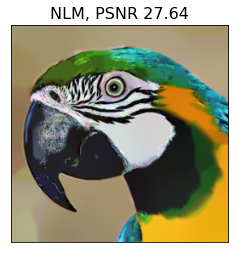

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


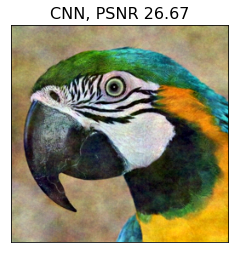

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


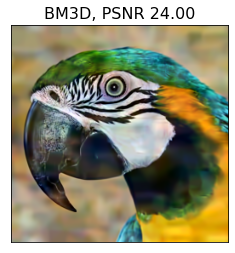

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


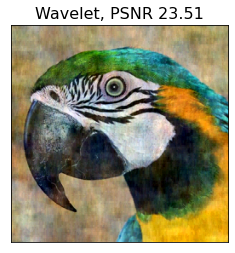

In [19]:
denoised_nlm = np.zeros((256,256,3), 'float')
denoised_nlm[..., 0] = z_slice0_nlm
denoised_nlm[..., 1] = z_slice1_nlm
denoised_nlm[..., 2] = z_slice2_nlm

denoised_cnn = np.zeros((256,256,3), 'float')
denoised_cnn[..., 0] = z_slice0_cnn
denoised_cnn[..., 1] = z_slice1_cnn
denoised_cnn[..., 2] = z_slice2_cnn

denoised_tv = np.zeros((256,256,3), 'float')
denoised_tv[..., 0] = z_slice0_tv
denoised_tv[..., 1] = z_slice1_tv
denoised_tv[..., 2] = z_slice2_tv

denoised_bm3d = np.zeros((256,256,3), 'float')
denoised_bm3d[..., 0] = z_slice0_bm3d
denoised_bm3d[..., 1] = z_slice1_bm3d
denoised_bm3d[..., 2] = z_slice2_bm3d

print(denoised_nlm.max())

imgplot = plt.imshow(denoised_nlm)
plt.title("NLM, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_nlm))
plt.xticks([])
plt.yticks([])
plt.show()

imgplot = plt.imshow(denoised_cnn)
plt.title("CNN, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_cnn))
plt.xticks([])
plt.yticks([])
plt.show()

imgplot = plt.imshow(denoised_bm3d)
plt.title("BM3D, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_bm3d))
plt.xticks([])
plt.yticks([])
plt.show()

imgplot = plt.imshow(denoised_tv)
plt.title("Wavelet, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_tv))
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
imgplot = plt.imshow(img)
plt.title("Original", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

imgplot = plt.imshow(noisy)
plt.title("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, noisy.astype('float')/256))
plt.xticks([])
plt.yticks([])
plt.show()

imgplot = plt.imshow(denoised)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


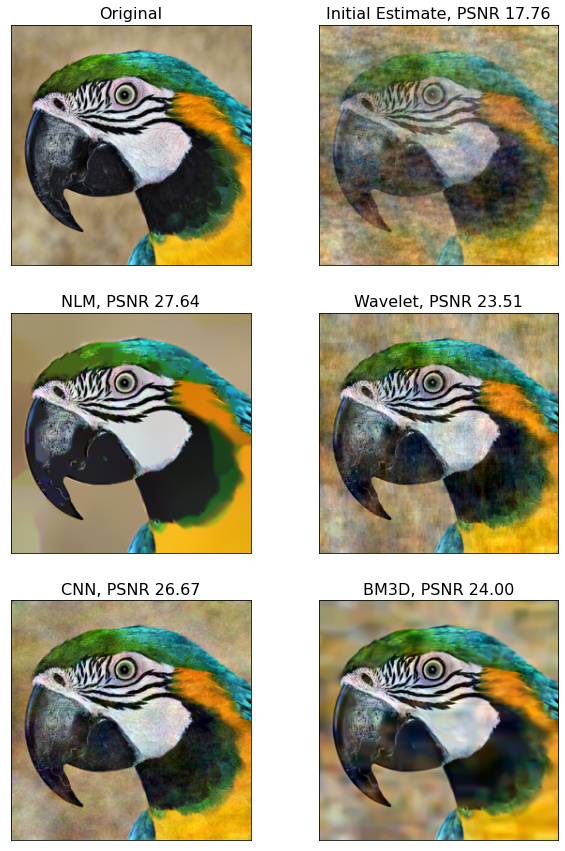

In [18]:
import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 6
columns = 4

fig_height = 15.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(6, 4, wspace=0.6, hspace=0.5)

ax1 = plt.subplot(gs[:2, :2])
ax1.imshow(img, cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')
plt.xticks([])
plt.yticks([])

ax2 = plt.subplot(gs[:2, 2:])
ax2.imshow(noisy, cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, noisy))
plt.xticks([])
plt.yticks([])

ax3 = plt.subplot(gs[2:4, :2])
ax3.imshow(denoised_nlm, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("NLM, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_nlm))
plt.xticks([])
plt.yticks([])

ax4 = plt.subplot(gs[2:4, 2:])
ax4.imshow(denoised_tv, cmap='gray', vmin=0, vmax=1)
ax4.title.set_text("Wavelet, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_tv))
plt.xticks([])
plt.yticks([])

ax5 = plt.subplot(gs[4:6, 2:])
ax5.imshow(denoised_bm3d, cmap='gray', vmin=0, vmax=1)
ax5.title.set_text("BM3D, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_bm3d))
plt.xticks([])
plt.yticks([])

ax6 = plt.subplot(gs[4:6, :2])
ax6.imshow(denoised_cnn, cmap='gray', vmin=0, vmax=1)
ax6.title.set_text("CNN, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_cnn))
plt.xticks([])
plt.yticks([])

plt.savefig("./figures/svrg_vs_denoiser_rgb.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [ ]:
params = create_problem(img_path='./data/Set12/07.png')
z_SVRG_nlm, time_SVRG_nlm, psnr_SVRG_nlm, zs_SVRG_nlm = pnp_svrg(params, 'nlm', eta=20000, tt=200, T2=10, mini_batch_size=20000, verbose=True)

In [ ]:
params = create_problem(img_path='./data/Set12/07.png')
z_SVRG_tv, time_SVRG_tv, psnr_SVRG_tv, zs_SVRG_tv = pnp_svrg(params, 'tv', eta=26000, tt=5000, T2=30, mini_batch_size=25000, verbose=True)

In [ ]:
params = create_problem(img_path='./data/Set12/07.png', lr_decay=1, filter_decay=1)
z_SVRG_bm3d, time_SVRG_bm3d, psnr_SVRG_bm3d, zs_SVRG_bm3d = pnp_svrg(params, 'bm3d', eta=20000, tt=2000, T2=30, mini_batch_size=20000, verbose=True)

In [ ]:
params = create_problem(img_path='./data/Set12/07.png', cnn_decay=0.95)
z_SVRG_cnn, svrg_time, svrg_psnr, svrg_zs = pnp_svrg(params=params,
                                                   denoiser='cnn',
                                                   eta=40e3, tt=100, T2=10, 
                                                   mini_batch_size=int(20e3), verbose=True)


In [ ]:
# show_grid([torch.Tensor(params['original']), torch.Tensor(params['noisy']), 
#            torch.Tensor(z_SVRG_nlm), torch.Tensor(z_SVRG_tv), torch.Tensor(z_SVRG_bm3d), torch.Tensor(z_SVRG_cnn)], ['Original','Initial Estimate',"NLM, PSNR %.2f" % peak_signal_noise_ratio(params['original'], z_SVRG_nlm), "TV, PSNR %.2f" % peak_signal_noise_ratio(params['original'], z_SVRG_tv), "BM3D, PSNR %.2f" % peak_signal_noise_ratio(params['original'], z_SVRG_bm3d), "CNN, PSNR %.2f" % peak_signal_noise_ratio(params['original'], z_SVRG_cnn)], figsize=(8,8))


# show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), 
#            torch.Tensor(z_SVRG), torch.Tensor(z_SGD), torch.Tensor(z_GD)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG), "PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD), "PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD)], rows=1, cols=5, figsize=(20,20))

import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 6
columns = 4

fig_height = 15.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(6, 4, wspace=0.6, hspace=0.5)

ax1 = plt.subplot(gs[:2, :2])
ax1.imshow(params['original'], cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[:2, 2:])
ax2.imshow(params['noisy'], cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(params['original'], params['noisy']))

ax3 = plt.subplot(gs[2:4, :2])
ax3.imshow(z_SVRG_nlm, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("NLM, PSNR %.2f" % peak_signal_noise_ratio(params['original'], z_SVRG_nlm))

ax4 = plt.subplot(gs[2:4, 2:])
ax4.imshow(z_SVRG_tv, cmap='gray', vmin=0, vmax=1)
ax4.title.set_text("Wavelet, PSNR %.2f" % peak_signal_noise_ratio(params['original'], z_SVRG_tv))

ax5 = plt.subplot(gs[4:6, 2:])
ax5.imshow(z_SVRG_bm3d, cmap='gray', vmin=0, vmax=1)
ax5.title.set_text("BM3D, PSNR %.2f" % peak_signal_noise_ratio(params['original'], z_SVRG_bm3d))

ax6 = plt.subplot(gs[4:6, :2])
ax6.imshow(z_SVRG_cnn, cmap='gray', vmin=0, vmax=1)
ax6.title.set_text("CNN, PSNR %.2f" % peak_signal_noise_ratio(params['original'], z_SVRG_cnn))

plt.savefig("./figures/svrg_vs_denoiser.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()


In [ ]:
with open('fig3.pkl', 'wb') as f:  
    pickle.dump([params, z_SVRG_nlm, z_SVRG_tv, z_SVRG_bm3d, z_SVRG_cnn], f)

## Figure 4: Compare Sampling Ratio for each PnP Algorithm

In [ ]:
num_probs = 20
num_trials = 3
sample_probs = np.linspace(.1, 1, num_probs)

prob_vs_psnr_SVRG = []
prob_vs_psnr_GD = []
prob_vs_psnr_SGD = []

for i in range(num_probs):
    samp_ratio_SVRG = []
    samp_ratio_GD = []
    samp_ratio_SGD = []
    samp_ratio_LSVRG = []
    for j in range(num_trials):
        samp_ratio_problem = create_problem('./data/Set12/13.png', H=256, W=256, sigma=5, sample_prob=sample_probs[i])
        
        z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(samp_ratio_problem, 'nlm', eta=2000, tt=200, T2=30, mini_batch_size=1000, verbose=True)
        samp_ratio_SVRG.append(psnr_SVRG[-1])

        z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(samp_ratio_problem, 'nlm', eta=2000, tt=200, verbose=True)
        samp_ratio_GD.append(psnr_GD[-1])

        z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(samp_ratio_problem, 'nlm', eta=1500, tt=200, mini_batch_size=5000, verbose=True)
        samp_ratio_SGD.append(psnr_SGD[-1])
    prob_vs_psnr_SVRG.append(np.average(samp_ratio_SVRG))
    prob_vs_psnr_GD.append(np.average(samp_ratio_GD))
    prob_vs_psnr_SGD.append(np.average(samp_ratio_SGD))


In [ ]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure(figsize=(8,8))
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(sample_probs, prob_vs_psnr_SVRG, "b*-")
psnr_ax.plot(sample_probs, prob_vs_psnr_GD, "gv-")
psnr_ax.plot(sample_probs, prob_vs_psnr_SGD, "rs-")


psnr_ax.set(xlabel='sampling rate (p = m/n)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-GD', 'PnP-SGD'), loc='lower right')
psnr_ax.grid()
plt.xlim(0.1, 1.0)
psnr_fig.tight_layout()

plt.savefig("./figures/samp_ratio.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [ ]:
with open('fig4.pkl', 'wb') as f:  
    pickle.dump([samp_ratio_problem, sample_probs, prob_vs_psnr_SVRG, prob_vs_psnr_GD, prob_vs_psnr_SGD], f)

## Figure 5: Compare Mini-Batch Size for PnP-SVRG

In [ ]:
num_bsizes = 300
num_trials = 5
bsizes = np.linspace(100, 30e3, num_bsizes)
bsizes = bsizes.astype('int')

bsizes_vs_psnr_SVRG = []

for i in range(num_bsizes):
    bsizes_SVRG = []
    for j in range(num_trials):
        bsizes_problem = create_problem('./data/Set12/13.png', H=256, W=256, sigma=1)
        z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(bsizes_problem, 'nlm', eta=500, tt=50, T2=30, mini_batch_size=bsizes[i], verbose=True)
        bsizes_SVRG.append(psnr_SVRG[-1])

    bsizes_vs_psnr_SVRG.append(np.average(bsizes_SVRG))

In [ ]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure(figsize=(8,8))
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(bsizes, bsizes_vs_psnr_SVRG, "b*-")

print(bsizes_vs_psnr_SVRG)
psnr_ax.set(xlabel='MiniBatch Size', ylabel='PSNR (dB)')
psnr_ax.legend(["PnP-SVRG"], loc='lower right')
psnr_ax.grid()

psnr_fig.tight_layout()

plt.savefig("./figures/bsize.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()